We are planning to use complex to complex 2D FFT to build complex to real 2D FFT. The question is how.

Someone suggested to apply 2D FFT to two UV planes simultaneously and push the result of one UV plane to the real part and the other UV result to image part of the complex 2D FFT output. 

Here the code build new UV planes from the original one. 
One new UV plane with hermetian property and the other UV plane with anti-hermetiaon property. 
If the suggestion works, the real part of 2D FFT output of the first new UV plane should be the same as the image prt of the 2D FFT of the second new UV plane. However, I do not see that, anything worng here? 

In [442]:
import numpy as np
from pylab import *
%matplotlib inline

np.set_printoptions(precision=3)

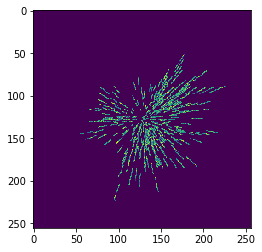

In [443]:
N = 256
# First to simulate a uv plane all cells have data
uv_full = np.random.random_sample((N,N)) + np.random.random_sample((N,N))*1j

# Real coordinate
coord = np.loadtxt("coord.txt").astype(int)

# Now only keep data at given coordinate
row_indices = coord[:,0]
col_indices = coord[:,1]
uv_indices  = np.zeros((N,N))
uv_indices[row_indices, col_indices] = 1
uv = uv_full * uv_indices
imshow(np.abs(uv))

The hermetian function should build a new UV plane with hermetian property as the image part of the 2D FFT output of the new plane is zero.

In [444]:
# Function to create matrxi with hermetian function property
def hermetian(uv, coord, N):
    
    uv_hermetian = np.zeros((N, N), dtype=np.complex64)
    for index in range(len(coord)):
        row   = coord[index, 0]
        col   = coord[index, 1]
        h_row = (N-row)%N
        h_col = (N-col)%N
        
        uv_hermetian[row, col]     = uv[row, col]
        uv_hermetian[h_row, h_col] = np.conj(uv[row, col])
    return uv_hermetian

3239.1717144367285 6.750155989720952e-14


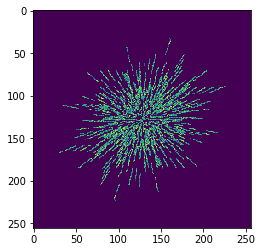

In [445]:
# UV plane with hermetian property
uv_h = hermetian(uv, coord, N)
imshow(np.abs(uv_h))

# Image part of 2D complex to complex FFT of hermetian UV plane should be close to zero
# Real part should be big
h_imag = np.fft.fft2(np.fft.fftshift(uv_h))
print np.abs(h_imag.real).max(), np.abs(h_imag.imag).max()

The anti_hermetian function should build a new UV plane with anti hermetian property as the real part of the 2D FFT output of the new plane is zero.

In [446]:
# Function to create matrxi with anti-hermetian function property
def anti_hermetian(uv, coord, N):
    
    uv_anti_hermetian = np.zeros((N, N), dtype=np.complex64)
    for index in range(len(coord)):
        row   = coord[index, 0]
        col   = coord[index, 1]
        h_row = (N-row)%N
        h_col = (N-col)%N
        
        uv_anti_hermetian[row, col]     = uv[row, col]
        uv_anti_hermetian[h_row, h_col] = -np.conj(uv[row, col])
    return uv_anti_hermetian

2.2350177264485183e-13 3299.946276024435


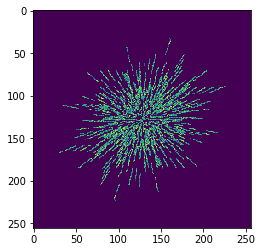

In [447]:
# UV plane with anti-hermetian property
uv_ah = anti_hermetian(uv, coord, N)
imshow(np.abs(uv_ah))

# Image part of 2D complex to complex FFT to anti hermetian UV plane should be big
# Real part should be close to zero
ah_imag = np.fft.fft2(np.fft.fftshift(uv_ah))
print np.abs(ah_imag.real).max(), np.abs(ah_imag.imag).max()

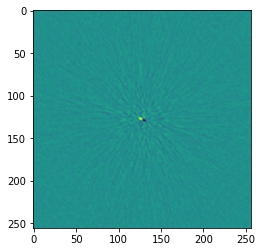

In [448]:
imshow(np.fft.fftshift(ah_imag).imag-np.fft.fftshift(h_imag).real)

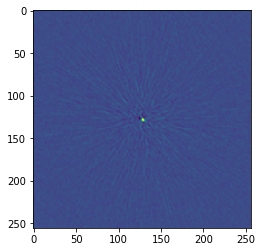

In [449]:
imshow(np.fft.fftshift(h_imag).real)

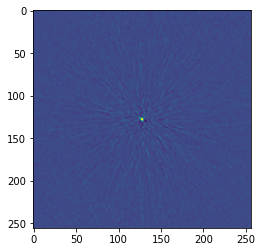

In [450]:
imshow(np.fft.fftshift(ah_imag).imag)

In [451]:
print np.fft.fftshift(ah_imag).imag

[[-83.858 -51.855  -5.605 ...  -9.978 -51.955 -81.048]
 [-35.172  -3.008  36.408 ... -16.393 -40.28  -44.172]
 [-17.911  -6.985  31.408 ...  15.665   3.701  -6.404]
 ...
 [ 75.467  38.993   0.089 ...  75.554  59.454  64.727]
 [  4.824 -19.996 -25.131 ...  41.963  27.095  14.254]
 [-79.104 -70.598 -36.241 ...   3.023 -33.481 -65.839]]


In [452]:
print np.fft.fftshift(h_imag).real

[[ 1.450e+01 -3.303e+01 -6.576e+01 ...  4.728e-02  3.007e+00  2.836e+01]
 [-6.042e+00 -2.087e+01 -2.755e+01 ...  2.107e+01 -1.865e+01 -1.596e+01]
 [ 2.116e+01  3.587e+01  2.964e+01 ...  2.438e+01 -3.039e+01 -2.583e+01]
 ...
 [ 3.081e+01  5.123e+01  6.024e+01 ... -2.495e+01  1.728e+01  2.747e+01]
 [ 9.382e+01  4.720e+01 -2.866e+00 ... -4.641e+00  6.340e+01  1.088e+02]
 [ 8.585e+01  1.277e+01 -5.806e+01 ... -1.427e+01  4.500e+01  1.038e+02]]


In [453]:
fft_result1 = np.abs(np.fft.fftshift(h_imag).real)
fft_result2 = np.abs(np.fft.fftshift(ah_imag).imag)

In [454]:
print np.where(fft_result1==fft_result2[1,1]) # The result is fully different from each other

(array([], dtype=int64), array([], dtype=int64))
